#DATA MINING AND NEURAL NETWORKS    
##Assignment 2.1 - Time-series Prediction

Prof. Dr. Ir. Johan A. K. Suykens     

In this file, we work on the time-series prediction using non-linear autoregressive model (NAR).

Specifically, we will conduct prediction on Climate Change dataset. The method is implemented with a ``python`` package named ``Skforecast``.


We implement the prediction method with a python package named ``Skforecast``, which is a simple library that contains the classes and functions necessary to adapt any ``scikit-learn`` regression model to forecasting problems.

We need to install the ``Skforecast`` with the following command.

In [1]:
!pip install skforecast


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Climate Change Forecast
In this section, we will conduct time-series prediction on the climate change dataset.

Please first download the data csv file from [here](https://drive.google.com/file/d/1q3D4h8XF6sqD1BgP9M9Yl0XPT9B7FvRy/view?usp=sharing), and put it into your working directory.

In [2]:
import numpy as np
import pandas as pd

# Load the global land temperature dataset
df = pd.read_csv("C:/Users/alber/OneDrive/Documents/Uhasselt/Course Matos/Year 2/Data Mining and Neural Networks/Assignments/Assignment 1/GlobalLandTemperaturesByCity.csv")

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
# List the cities included in the datasets
# You can choose any city that you like
df['City'].unique()

array(['Århus', 'Çorlu', 'Çorum', ..., 'Zurich', 'Zuwarah', 'Zwolle'],
      dtype=object)

In [5]:
# Check if your chosen city is included in the data
print('Shanghai' in df['City'].unique())

True


In [8]:
# Data Cleaning
df = df.dropna() # Remove null values
df_shanghai = df[df.City == "Shanghai"]
df_shanghai.index = pd.to_datetime(df_shanghai.dt)
df_shanghai.head()
len(df_shanghai) # Check the number of samples in the df_shanghai

2072

In [9]:
df_shanghai.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,,
1841-01-01,1841-01-01,1.809,2.733,Shanghai,China,31.35N,120.63E
1841-02-01,1841-02-01,3.366,1.917,Shanghai,China,31.35N,120.63E
1841-03-01,1841-03-01,7.122,1.936,Shanghai,China,31.35N,120.63E
1841-04-01,1841-04-01,13.306,2.004,Shanghai,China,31.35N,120.63E
1841-05-01,1841-05-01,19.007,1.369,Shanghai,China,31.35N,120.63E


In [10]:
# Preserve only the average temperatures data
avg_tmp = df_shanghai['AverageTemperature']
print(avg_tmp)

dt
1841-01-01     1.809
1841-02-01     3.366
1841-03-01     7.122
1841-04-01    13.306
1841-05-01    19.007
               ...  
2013-04-01    15.077
2013-05-01    21.292
2013-06-01    24.637
2013-07-01    30.623
2013-08-01    30.493
Name: AverageTemperature, Length: 2072, dtype: float64


## Visualize the dataset
Here we partition the dataset into training, validation and test sets. Note that test set is of 20% of the whole dataset, training is (80% $\times$ 80%) of the original dataset and validation is (80% $\times$ 20%) of the dataset.

In [11]:
# We choose the first 80% of the dataset as (training set + validation set)
# The rest of 20% as test set
import math

data_size = len(avg_tmp)
train_set = avg_tmp[:math.floor(data_size * 0.8*0.8)]
val_set = avg_tmp[math.floor(data_size * 0.8*0.8):math.floor(data_size * 0.8)]
test_set = avg_tmp[math.floor(data_size * 0.8):]

Text(0.5, 1.0, 'Average Temperature of Shanghai from 1841 to 2013')

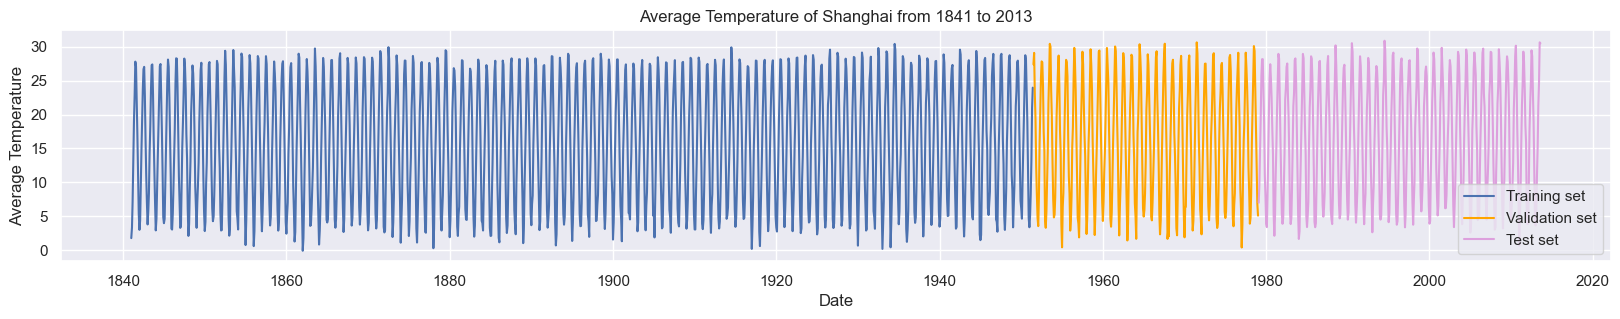

In [12]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

plt.rcParams["figure.dpi"]=100
plt.rcParams['savefig.dpi']=300

plt.figure(figsize=(20,3))
fig = plt.figure(1)
ax = fig.add_subplot(111) # 111: No. of rows, cols, index
ax.set_xlabel("Date")
ax.set_ylabel("Average Temperature")
ax.plot(train_set, label="Training set")
ax.plot(val_set, label="Validation set", c="orange")
ax.plot(test_set, label="Test set", c="plum")
ax.legend()
plt.title("Average Temperature of Shanghai from 1841 to 2013")
# plt.savefig("./global_temp_shanghai.jpg", bbox_inches='tight') # save figure

## Train Non-linear Autoregressive Model
Now, we start to train a non-linear autoregressive (NAR) model on the training set and choosing the hyper-parameters on the validation set.

If you choose support vector regressor as the regression model, then in addtion to tune on ``lags``, you need to tune on ``kernel``, ``gamma``, etc.
If you choose random forest, you mainly need to tune on ``lags``.
You can also choose other machine learning regression method for the autoregressive model.

After deciding the hyper-parameters, you can predict the results on the test set.

We will utilize package ``skforecast`` for implementation.

In [29]:
# Modeling and Forecasting
# First import the necessary sklearn regression method
from sklearn.neural_network import MLPRegressor # we use neural network as regressor
from sklearn.metrics import mean_squared_error

# We import the prediction functions from skforecast
from skforecast.recursive import ForecasterRecursive

forecaster = ForecasterRecursive(
    regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500), # you can tune the hidden dimension and other hyper-parameters here
    lags = 6 # you can tune the lags here
    )

# fit model on the training set
forecaster.fit(y=train_set)
# print the NAR model
forecaster

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

=================== 
ForecasterRecursive 
=================== 
Regressor: MLPRegressor 
Lags: [1 2 3 4 5 6] 
Window features: None 
Window size: 6 
Series name: AverageTemperature 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [0, 1325] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: 
    {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9,
    'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08,
    'hidden_layer_sizes': (50,), 'learning_rate': 'constant',
    'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum':
    0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5,
    'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001,
    'validation_fraction': 0.1, 'verbose': False, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2025-05-23 19:59:00 
Last fit date: 2025-05-23 19:59:01 
Skforecast version: 0.16.0 
Python version: 3.12.7 
Forecaster id: None

After fitting/training the model on the training set, we evaluate the results on the validation set.

In [31]:
steps = len(val_set)
predictions = forecaster.predict(steps=steps)
predictions.head(10)

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

6     28.413671
7     28.681221
8     24.290684
9     18.610909
10    12.293880
11     6.158405
12     3.215013
13     4.300417
14     8.701382
15    14.361236
Name: pred, dtype: float64

In [32]:
# compute the root mean squared error between the predictions and validation set
mse = mean_squared_error(val_set, predictions)
print("The MSE on the validation set is: {:.3f}".format(mse))

The MSE on the validation set is: 2.249


We now visualize the prediction results and the ground-truth validation data.

Text(0.5, 1.0, 'Prediction results on validation of Shanghai dataset')

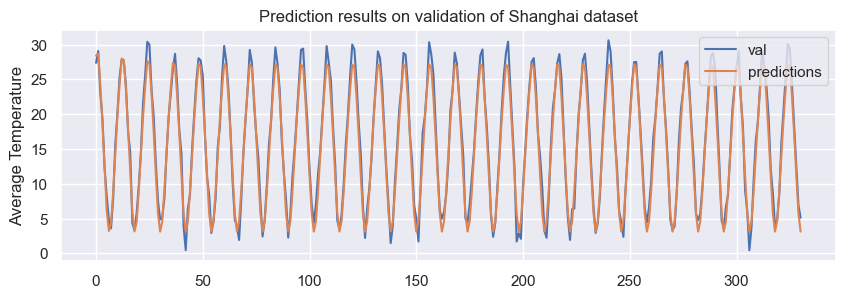

In [33]:
# Plot
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(val_set.to_numpy(), label='val')
ax.plot(predictions.to_numpy(), label='predictions')
ax.legend()
ax.set_ylabel("Average Temperature")
plt.title("Prediction results on validation of Shanghai dataset")

## Tune the hyper-parameter ``lags``
We first try a large range of lags as follows:

In [35]:
lag_list = np.arange(2,50,2)
mse_list = []
for i in range(len(lag_list)):
    # Set regressor
    forecaster = ForecasterRecursive(
        regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500), # you can tune the hidden dimension and other hyper-parameters here
        lags = int(lag_list[i]) # you can try different lags here
    )

    # Trainig on training set
    forecaster.fit(y=train_set)

    # Evaluate model on validation set
    steps = len(val_set)
    predictions = forecaster.predict(steps=steps)

    # Compute MSE between predictions and ground-truth data

    mse = mean_squared_error(val_set, predictions)
    mse_list.append(mse)
    print("The MSE on the validation set is: {:.3f}".format(mse))

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 4.060


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 19.586


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

c:\Users\alber\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 1.477


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 9.983


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 10.559


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 2.515


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 8.550


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 2.398


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 1.489


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 18.295


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 3.137


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 3.399


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 4.499


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 6.048


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 18.592


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 6.333


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 25.929


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 1.550


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 222.120


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 1.644


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 3.102


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 3.897


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 881.811


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 2.313


C:\Users\alber\AppData\Local\Temp\ipykernel_20776\1740992293.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


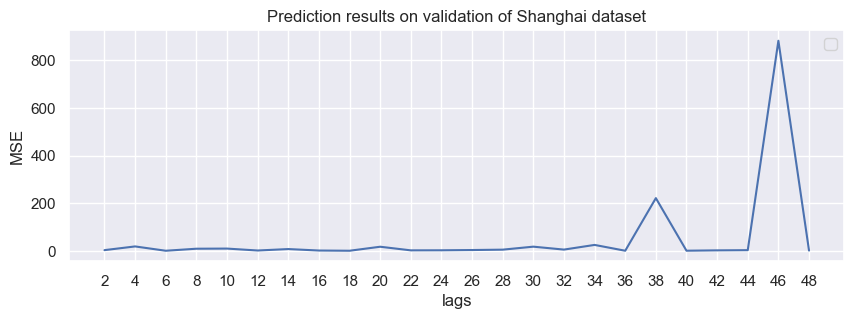

In [36]:
# Plot the MSE_list curve to select the best lags
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(mse_list)
ax.legend()
ax.set_xlabel("lags")
ax.set_ylabel("MSE")
plt.title("Prediction results on validation of Shanghai dataset")
plt.xticks(np.arange(len(lag_list)),np.arange(2,50,2));

We now try a smaller range of lags that gives the lowest MSE.

In [38]:
# We change to a smaller range of lags
lag_list = np.arange(2,10,1)
mse_list = []
for i in range(len(lag_list)):
    # Set regressor
    forecaster = ForecasterRecursive(
        regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500),
        lags = int(lag_list[i]) # you can try different lags here
    )

    # Trainig on training set
    forecaster.fit(y=train_set)

    # Evaluate model on validation set
    steps = len(val_set)
    predictions = forecaster.predict(steps=steps)

    # Compute MSE between predictions and ground-truth data

    mse = mean_squared_error(val_set, predictions)
    mse_list.append(mse)
    print("The MSE on the validation set is: {:.3f}".format(mse))

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 18.205


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 17.555


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 69.369


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 3.630


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 3.268


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 2.647


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 8.958


╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE on the validation set is: 1.800


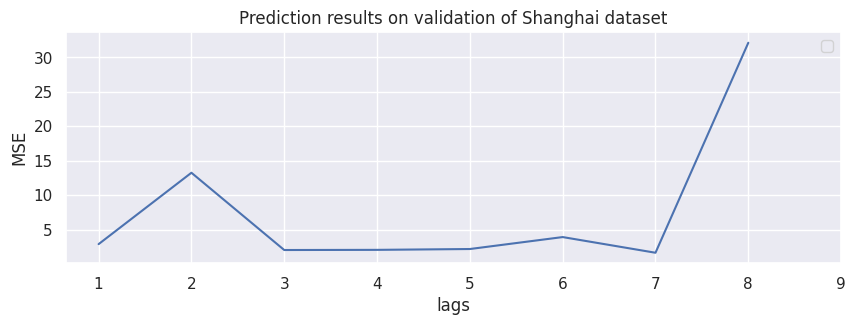

In [ ]:
# Plot the MSE_list curve to select the best lags
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(mse_list)
ax.legend()
ax.set_xlabel("lags")
ax.set_ylabel("MSE")
plt.title("Prediction results on validation of Shanghai dataset")
plt.xticks(np.arange(9),np.arange(1,10,1));

In [45]:
# Seems that lag=5 gives good prediction results
# Hence, we try lag=5
forecaster = ForecasterRecursive(
        regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500),
        lags = 6
    )

# Trainig on training set
forecaster.fit(y=train_set)

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1402 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

In [46]:
# Evaluate model on test set
steps = len(val_set) + len(test_set)
predictions = forecaster.predict(steps=steps)[len(val_set):]

# Compute MSE between predictions and ground-truth data
mse = mean_squared_error(test_set, predictions)
print("The MSE of prediction results on the test set is: {:.3f}\n".format(mse))

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : c:\Users\alber\anaconda3\Lib\site-packages\skforecast\utils\utils.py:1446 │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

The MSE of prediction results on the test set is: 2.469



Text(0.5, 1.0, 'Prediction results on test set of Shanghai dataset (lag=5)')

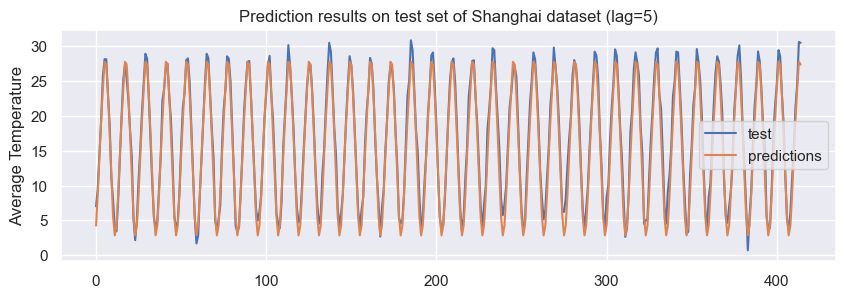

In [47]:
# Plot the prediction results on the test set
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(test_set.to_numpy(), label='test')
ax.plot(predictions.to_numpy(), label='predictions')
ax.legend()
ax.set_ylabel("Average Temperature")
plt.title("Prediction results on test set of Shanghai dataset (lag=5)")